# **1. Perkenalan Dataset**


Pada proyek ini, dataset yang digunakan adalah Banknote Authentication yang dapat diakses pada https://archive.ics.uci.edu/dataset/267/banknote+authentication

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [18]:
# Library umum yang biasa digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk mengeksport dataset
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Library untuk standarisasi
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Fetch dataset UCI Banknote (ID = 267)
banknote_authentication = fetch_ucirepo(id=267)

# Memisahkan fitur dan target
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

# Gabungkan fitur dan target dalam satu dataframe
df = pd.concat([X, y], axis=1)

# Simpan ke file CSV
df.to_csv("banknote.csv", index=False)

In [3]:
# Menampilkan 5 baris teratas dataset
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
# Memeriksa missing values
df.isnull().sum()

,0
variance,0
skewness,0
curtosis,0
entropy,0
class,0


**Insight:**

setelah diperiksa missing valuesnya, terlihat bahwa tidak ada missing values pada dataset ini.

In [6]:
# Memeriksa data duplicated
print(f'jumlah duplicated data adalah: {df.duplicated().sum()}')

jumlah duplicated data adalah: 24


**Insight:**

Terdapat 24 duplikasi data, duplikasi ini akan dibersihkan pada tahapan data processing

In [7]:
# Menampilkan data statistik deskriptif
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


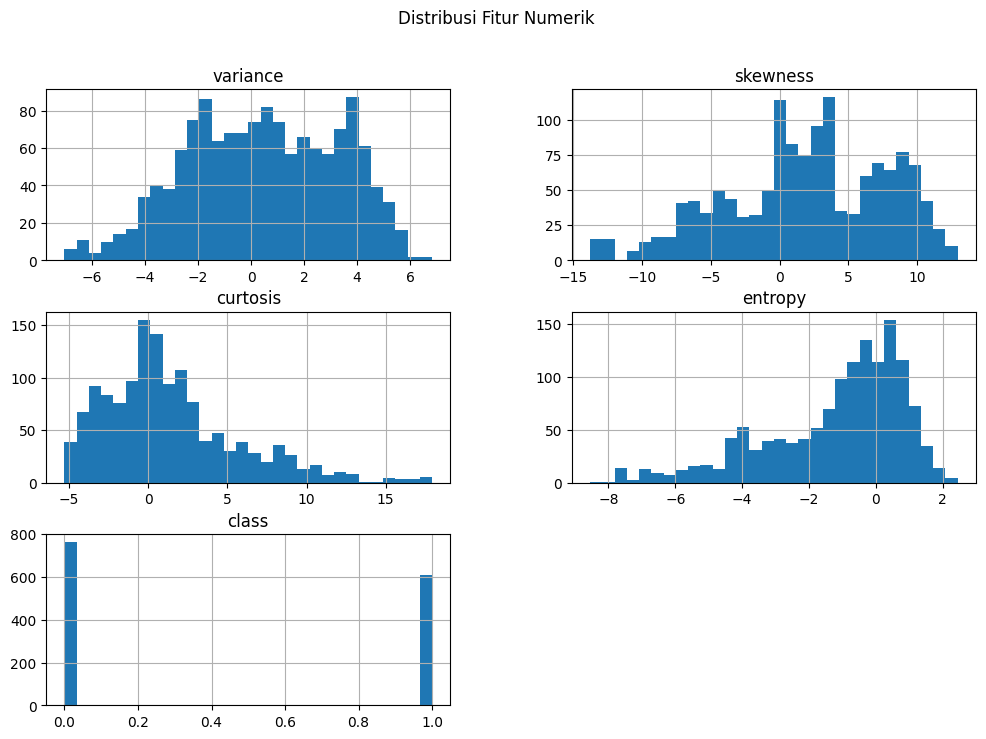

In [8]:
# Visualisasi distribusi fitur numerik
df.hist(bins=30, figsize=(12,8))
plt.suptitle("Distribusi Fitur Numerik")
plt.show()

**Insight:**

Berdasarkan gambar histogram diatas, didapatkan:
1. Variance terlihat memiliki distribusi mendekati normal dengan beberapa nilai ekstrem (outlier) di kedua sisi.
2. Skewness memiliki distribusi multimodal dengan beberapa puncak, mengindikasikan data berasal dari beberapa kelompok atau pola.
3. Curtosis menunjukkan distribusi miring ke kanan dengan ekor panjang, mengindikasikan keberadaan nilai ekstrem tinggi.
4. Entropy lebih banyak berkumpul di nilai negatif dan cenderung miring ke kiri.
5. Distribusi class menunjukkan bahwa data dibagi menjadi dua kelas (0 dan 1) dalam jumlah yang hampir seimbang, yang baik untuk pemodelan klasifikasi.

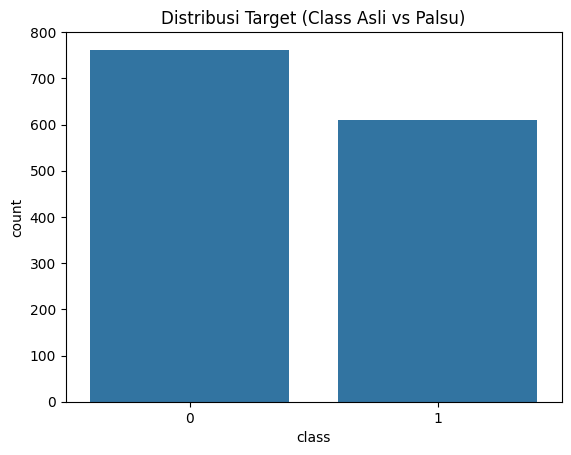

In [9]:
# Visualisasi distribusi label target
sns.countplot(data=df, x='class')
plt.title("Distribusi Target (Class Asli vs Palsu)")
plt.show()

**Insight:**

Berdasarkan gambar visualisasi diatas, terlihat bahwa class 0 (asli) sedikit lebih banyak daripada class 1 (palsu), namun perbedaannya tidak terlalu signifikan. Dapat disimpulkan bahwa dataset ini cukup seimbang, sehingga tidak diperlukan teknik balancing tambahan seperti oversampling atau undersampling dalam tahap preprocessing data untuk model klasifikasi.

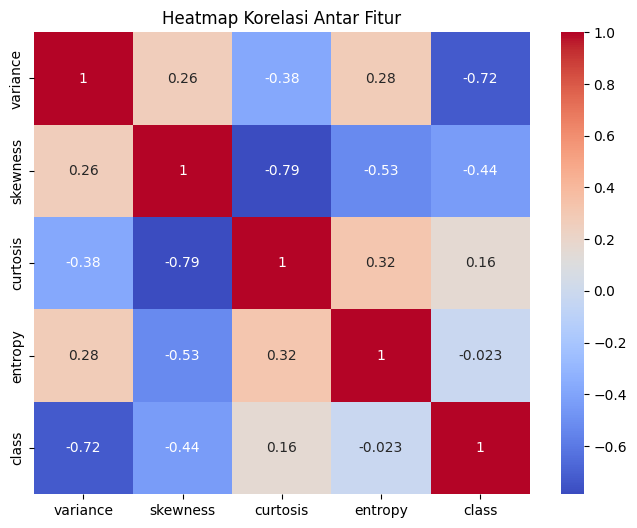

In [10]:
# Menampilkan heatmap untuk melihat korelasi antar fitur
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

**Insight:**

Heatmap ini menunjukkan nilai korelasi antar fitur dan terhadap target class, berikut adalah insight yang didapatkan:
1. Variance memiliki korelasi negatif yang kuat dengan class (-0.72), artinya semakin tinggi variance, kemungkinan besar data termasuk class 0 (asli).
2. Skewness juga menunjukkan korelasi negatif sedang terhadap class (-0.44).
Curtosis dan entropy memiliki korelasi rendah terhadap class, sehingga kurang informatif.
3. Korelasi antar fitur juga perlu diperhatikan, seperti skewness dan curtosis yang berkorelasi negatif cukup tinggi (-0.79), yang bisa jadi indikator redundansi fitur.

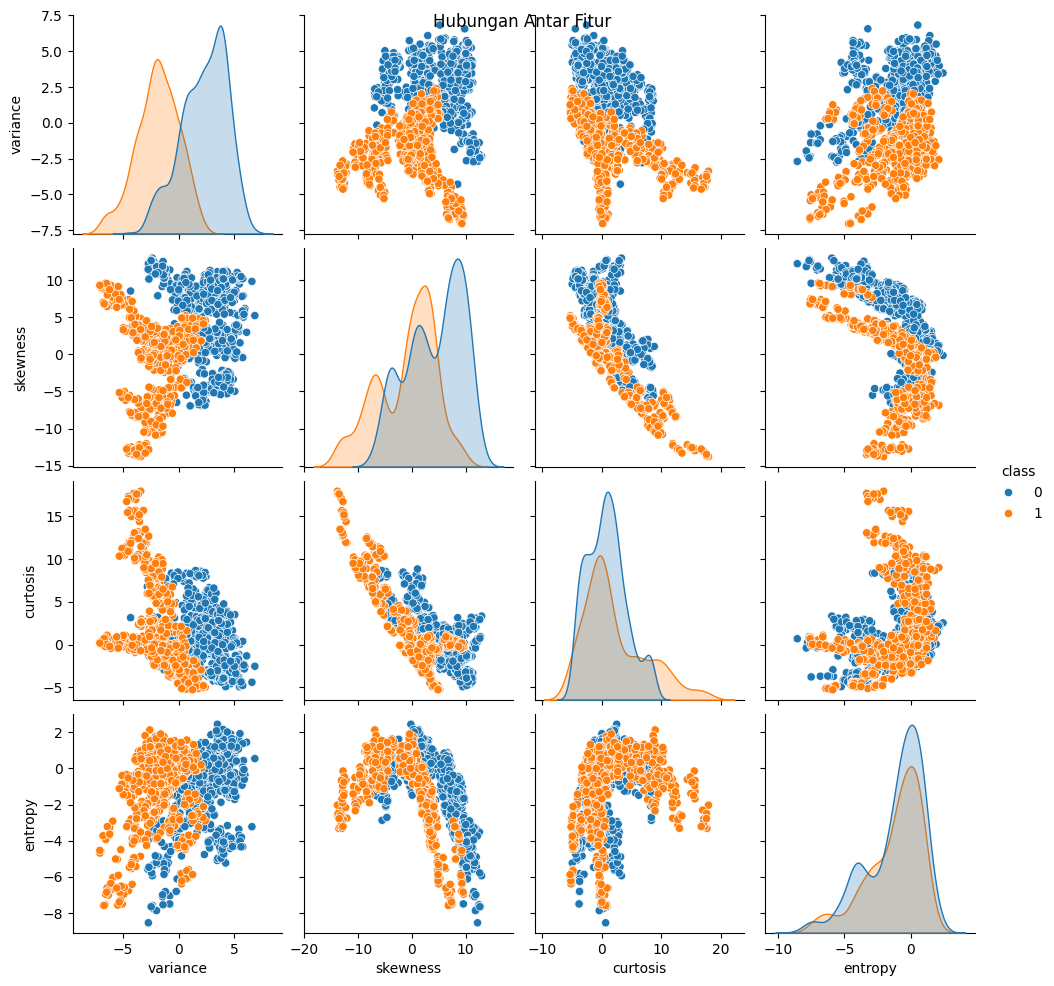

In [11]:
# Visualisasi hubungan antar fitur menggunakan pair plot
sns.pairplot(df, hue='class')
plt.suptitle("Hubungan Antar Fitur")
plt.show()

**Insight:**
Pairplot ini membantu memahami hubungan antar fitur dan bagaimana mereka memisahkan class. Berdasarkan pairplot diatas terlihat bahwa kombinasi fitur seperti variance vs skewness dan skewness vs curtosis menunjukkan pemisahan yang cukup jelas antara class 0 dan 1. Titik-titik dengan warna berbeda (class 0 biru, class 1 oranye) menunjukkan pola distribusi yang berbeda secara visual, terutama di fitur-fitur tertentu. Berdasarkan pairplot ini dapat disimpulkan bahwa beberapa fitur memang memiliki kekuatan diskriminatif terhadap target, dan sangat membantu untuk model klasifikasi.

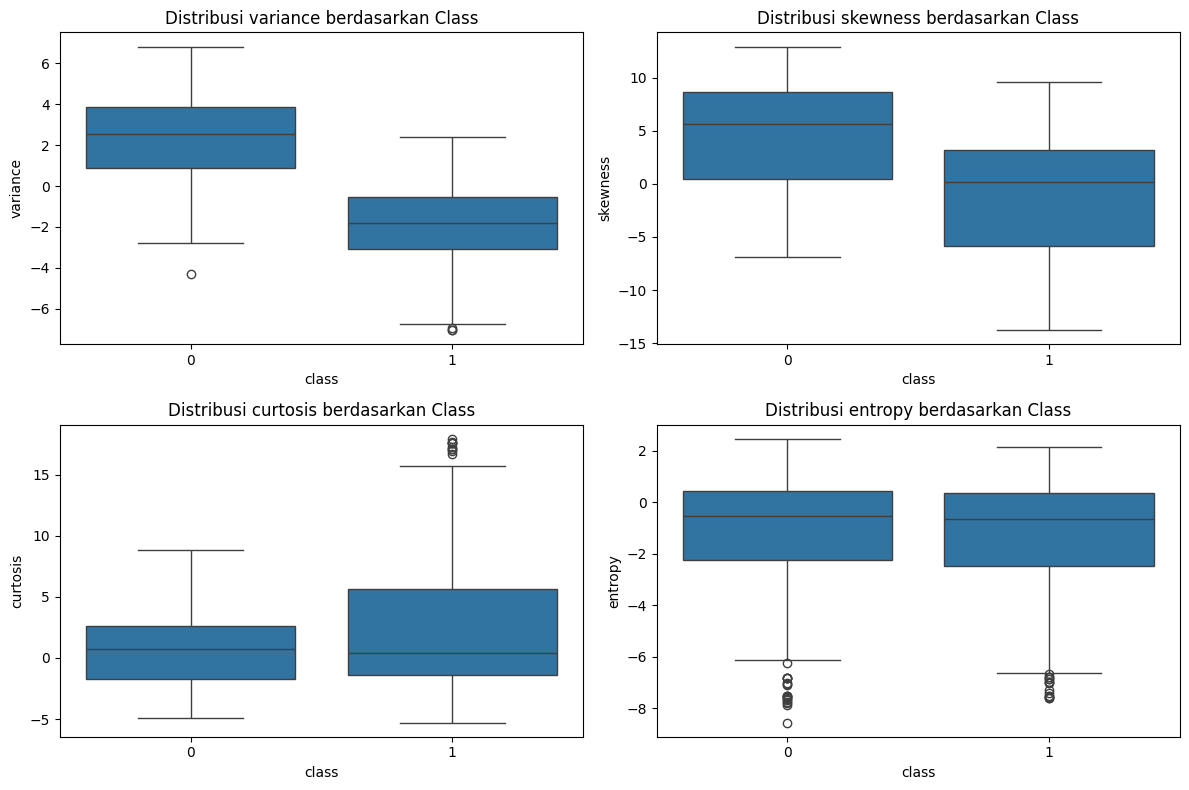

In [12]:
# Memeriksa outlier
plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f"Distribusi {col} berdasarkan Class")
plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan hasil visualisasi boxplot diatas, ditemukan adanya sejumlah outlier yang signifikan yang tersebar di berbagai fitur. Secara umum, fitur seperti variance, skewness, dan terutama curtosis menunjukkan adanya nilai-nilai ekstrem yang mencolok, baik pada class 0 maupun class 1. Fitur curtosis menjadi perhatian utama karena mengandung jumlah outlier terbanyak, khususnya pada class 1 yang diasumsikan sebagai representasi uang palsu, artinya adanya ketidakwajaran dalam distribusi data yang dapat mengganggu proses pembelajaran model. Variance juga memperlihatkan penyimpangan nilai yang cukup besar, dengan outlier mencuat tinggi di kelas 0. Sementara itu, fitur skewness menampilkan beberapa nilai ekstrem, namun penyebarannya masih relatif moderat dan tidak seekstrem fitur sebelumnya. Namun, fitur entropy terlihat memiliki distribusi yang lebih stabil antar class, dengan jumlah outlier yang sangat sedikit sehingga tidak memerlukan penanganan khusus. Sehingga akan dilakukan penanganan menggunakan metode IQR untuk fitur curtosis, variance, dan skewness pada tahapan data processing

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [20]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)

# Memeriksa data duplicated setelah dibersihkan
print(f'jumlah duplicated data setelah dibersihkan adalah: {df.duplicated().sum()}')

jumlah duplicated data setelah dibersihkan adalah: 0


In [14]:
# Penanganan outlier menggunakan metode IQR
# Fungsi IQR untuk membersihkan outlier
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Membuat salinan dataframe
df_clean = df.copy()

# Kolom-kolom yang perlu dibersihkan
columns_with_outliers = ['variance', 'curtosis', 'skewness']

# Melakukan pembersihan per kolom
for col in columns_with_outliers:
    df_clean = handle_outliers_iqr(df_clean, col)

# Memeriksa sisa data
print(f"Jumlah data sebelum: {df.shape[0]}")
print(f"Jumlah data sesudah : {df_clean.shape[0]}")

Jumlah data sebelum: 1348
Jumlah data sesudah : 1289


In [16]:
# Standarisasi menggunakan standard scaller
# Pisahkan fitur dan target (karena target bernilai 1 dan 0 jadi tidak di standarisasi)
X = df_clean.drop(columns='class')
y = df_clean['class']

# Inisialisasi dan terapkan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menggabungkan kembali menjadi DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['class'] = y.values

In [ ]:
# Simpan dataset yang bersih
df_scaled.to_csv('banknote_preprocessing.csv', index=False)